<a href="https://colab.research.google.com/github/mfathul21/travel-insurance/blob/main/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Insurance Prediction Data


## Domain Proyek

**Latar Belakang**

Dalam industri perjalanan dan pariwisata, asuransi perjalanan merupakan komponen penting yang memberikan perlindungan untuk berbagai risiko yang terkait dengan perjalanan, seperti pembatalan perjalanan, keadaan darurat medis, kehilangan bagasi, dan penundaan penerbangan. Namun, tingkat konversi asuransi perjalanan bisa jadi rendah, dan memahami perilaku serta preferensi pelanggan sangat penting untuk meningkatkan penjualan asuransi perjalanan.

Proyek ini bertujuan untuk membangun model prediksi asuransi perjalanan yang dapat memprediksi apakah pelanggan akan membeli asuransi perjalanan atau tidak berdasarkan berbagai fitur. Model ini akan membantu agen perjalanan dan perusahaan asuransi untuk mengidentifikasi pelanggan potensial, mempersonalisasi produk asuransi mereka, dan meningkatkan tingkat konversi mereka.



**Mengapa dan bagaimana masalah tersebut harus diselesaikan?**

Tingkat konversi asuransi perjalanan relatif rendah, dan ada kebutuhan untuk memahami perilaku dan preferensi pelanggan untuk meningkatkan penjualan asuransi perjalanan. Menganalisis fitur demografis dan fitur terkait perjalanan nasabah, seperti usia, jenis kelamin, tujuan, durasi perjalanan, dan frekuensi perjalanan, dapat memberikan wawasan tentang kemungkinan mereka untuk membeli asuransi perjalanan.

Namun, menganalisis fitur-fitur ini secara manual untuk setiap pelanggan dapat memakan waktu dan rentan terhadap kesalahan. Oleh karena itu, diperlukan model prediksi otomatis dan akurat yang dapat menganalisis fitur-fitur ini dan memprediksi kemungkinan nasabah untuk membeli asuransi perjalanan.

Referensi: <a href="https://www.researchgate.net/publication/373895975_Predicting_Travel_Insurance_Purchases_in_an_Insurance_Firm_through_Machine_Learning_Methods_after_COVID-19">Predicting Travel Insurance Purchases in an Insurance Firm through Machine Learning Methods after COVID-19</a>

## Business Understanding

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem prediksi asuransi perjalanan yang dapat memprediksi apakah pelanggan akan membeli asuransi perjalanan atau tidak berdasarkan berbagai fitur, untuk menjawab permasalahan berikut.

- Fitur mana yang memiliki dampak paling signifikan terhadap keputusan nasabah untuk membeli asuransi perjalanan?
- Membangun model prediktif dengan nilai ROC AUC di atas 70% yang dapat memprediksi dengan akurasi tinggi apakah pelanggan akan membeli asuransi perjalanan berdasarkan fitur-fitur yang telah diidentifikasi? Akurasi tinggi dalam konteks ini akan diukur menggunakan metrik evaluasi ROC AUC.

Untuk menjawab pertanyaan tersebut, Anda akan membuat predictive modelling dengan tujuan atau goals sebagai berikut:

- Menggunakan metode .feature_importances_ dari model yang dipilih untuk menemukan fitur-fitur yang memiliki dampak paling signifikan terhadap keputusan pembelian asuransi perjalanan.
- Membangun model prediktif dengan ROC AUC di atas 70% pada data uji. Dengan mencapai nilai ROC AUC tersebut, proyek dapat dikatakan berhasil karena model mampu memprediksi keputusan pembelian asuransi perjalanan dengan tingkat akurasi yang memadai.

**Statement Solusi**

Untuk mencapai tujuan tersebut, langkah-langkah berikut akan diambil:

- **Exploratory Data Analysis (EDA)**: Melakukan analisis data untuk memahami karakteristik data dan hubungan antara fitur-fitur dengan target.
- **Data Preparation**: Menangani nilai yang hilang, encoding fitur kategorikal, dan penskalaan fitur numerik untuk mempersiapkan data untuk pemodelan.
- **Pemodelan**: Membangun beberapa model pembelajaran mesin seperti Logistic Regression, Random Forest, dan Gradient Boosting. Setiap model akan dievaluasi menggunakan metrik ROC AUC pada data test.
- **Identifikasi Fitur Signifikan**: Menggunakan metode `.feature_importances_` dari model yang dipilih untuk mengidentifikasi fitur-fitur yang memiliki dampak paling signifikan terhadap keputusan pembelian asuransi perjalanan.
- **Hyperparameter Tuning**: Melakukan penyetelan hyperparameter pada model terbaik untuk meningkatkan kinerja dan memastikan bahwa model dapat mencapai minimal ROC AUC 0.7 jika belum terpenuhi.
- **Evaluasi dan Interpretasi**: Mengevaluasi kinerja model terhadap metrik yang ditentukan dan menginterpretasi hasil untuk mengidentifikasi fitur-fitur yang paling berpengaruh dalam keputusan pembelian asuransi perjalanan.

## Data Understanding

Data yang Anda gunakan pada proyek kali ini adalah "Travel Insurance Prediction Data" yang diunduh dari <a href="https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data">Kaggle API</a>. Untuk tahap training, dapat dilakukan hanya dengan menggunakan dataset ini sehingga tidak perlu menambahkan data lain atau melakukan penggabungan dataset lagi. Selain itu, dataset ini juga cukup bersih sehingga tidak terlalu banyak memerlukan proses data cleaning.

Dataset ini memiliki 1987 baris dengan 9 fitur, yang terdiri fitur non-numerik seperti Employment Type, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad, serta fitur numerik seperti Age, AnnualIncome, FamilyMembers, dan ChronicDiseases. Kedelapan fitur ini adalah fitur yang akan Anda gunakan dalam menemukan pola pada data, sedangkan TravelInsurance merupakan fitur target.

## Data Loading

### Download datasets from Kaggle to Google Colab

In [1]:
!pip install kaggle -q

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadfathul","key":"86f7af68314a74218ed685350e322691"}'}

In [3]:
import json
import os

# Check if the Kaggle API configuration directory exists, and if not, create it.
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move the uploaded Kaggle JSON file to the configuration directory.
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the permissions for the Kaggle JSON file.
os.chmod('/root/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 30.4MB/s]


In [5]:
!unzip travel-insurance-prediction-data.zip

Archive:  travel-insurance-prediction-data.zip
  inflating: TravelInsurancePrediction.csv  


### Import Datasets

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [7]:
insurance = pd.read_csv("/content/TravelInsurancePrediction.csv", index_col="Unnamed: 0")
insurance.sample(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
105,28,Private Sector/Self Employed,Yes,750000,3,0,No,No,0
1287,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0
188,26,Government Sector,Yes,500000,4,0,No,No,0
1231,34,Private Sector/Self Employed,Yes,1500000,4,1,Yes,Yes,1
1394,30,Private Sector/Self Employed,No,650000,3,1,No,No,0


In [17]:
print(f'shape of data: {insurance.shape}')

shape of data: (1249, 9)


Datasets yang dimiliki terdiri dari 1987 baris (records atau jumlah pengamatan) dan terdapat 9 fitur atau kolom termasuk satu fitur target, yaitu "TravelInsurance" yang memiliki nilai 0 (untuk pelanggan yang tidak membeli paket asuransi perjalanan) dan 1 (untuk pelanggan yang tidak membeli paket asuransi perjalanan).

## Exploratory Data Analysis

### Features Description

Berdasarkan informasi dari Kaggle, fitur-fitur pada Travel Insurance dataset adalah sebagai berikut:

- `Age` - Usia Pelanggan
- `Employment Type` - Sektor di Mana Pelanggan Bekerja
- `GraduateOrNot` - Apakah Pelanggan Lulus Kuliah atau Tidak
- `AnnualIncome` - Pendapatan Tahunan Pelanggan dalam Rupee India [Dibulatkan ke Nearest 50 Ribu Rupee]
- `FamilyMembers` - Jumlah Anggota dalam Keluarga Pelanggan
- `ChronicDiseases` - Apakah Pelanggan Menderita Penyakit atau Kondisi Mayor seperti Diabetes/Tekanan Darah Tinggi atau Asma, dll.
- `FrequentFlyer` - Data yang Didapat Berdasarkan Riwayat Pelanggan dalam Membeli Tiket Pesawat di Setidaknya 4 Kali Berbeda dalam 2 Tahun Terakhir [2017-2019].
- `EverTravelledAbroad` - Apakah Pelanggan Pernah Berpergian ke Luar Negeri [Tidak Necessarily Menggunakan Layanan Perusahaan]
- `TravelInsurance` - Apakah Pelanggan Membeli Paket Asuransi Perjalanan Selama Penawaran Pengenalan yang Diadakan pada Tahun 2019.

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


- Terdapat 4 fitur pada datasets dengan tipe object yaitu Employment Type, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad.
- Terdapat 5 fitur pada datasets dengan tipe int, yaitu Age, AnnualIncome, FamilyMembers, ChronicDiseases, dan TravelInsurance.

In [10]:
insurance.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Dari hasil fungsi `.describe()`, tidak ditemukan informasi yang anomali atau ambigu. Berikut adalah informasi yang dapat disimpulkan:

- Usia (Age): Rata-rata usia pelanggan adalah sekitar 29 tahun, dengan rentang usia antara 25 hingga 35 tahun.
- Pendapatan Tahunan (AnnualIncome): Rata-rata pendapatan tahunan pelanggan adalah 900.000 rupee.
- Jumlah Anggota Keluarga (FamilyMembers): Rata-rata jumlah anggota keluarga pelanggan berkisar antara 4 hingga 5 orang.
- Chronic Diseases (ChronicDiseases): Terdiri dari dua nilai, di mana 0 menunjukkan bahwa pelanggan tidak memiliki riwayat penyakit kronis, dan 1 menunjukkan bahwa pelanggan menderita penyakit kronis.
- Travel Insurance (TravelInsurance): Terdiri dari dua nilai, dengan 0 menandakan bahwa pelanggan tidak membeli produk asuransi, dan 1 menandakan bahwa pelanggan membeli produk asuransi.

In [11]:
insurance.describe(include=[object])

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


Pada masing-masing fitur kategori, terdapat 2 nilai unik, dengan mayoritas pelanggan bekerja di sektor swasta, memiliki gelar sarjana, bukan anggota program FrequentFlyer, dan belum pernah bepergian ke luar negeri.

### Handling Missing Values, Duplicates, dan Outlier

In [12]:
insurance.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Pada datasets "TravelInsurance" tidak terdapat nilai yang hilang (missing values), sehingga tidak diperlukan tindakan lebih lanjut seperti remove missing value ataupun dilakukan replace dengan nilai tertentu seperti median, mean, ataupun modus.

In [13]:
insurance.duplicated().sum()

738

In [14]:
insurance.drop_duplicates(keep='first', inplace=True)
insurance.duplicated().sum()

0

In [16]:
print(f'new shape of data: {insurance.shape}')

new shape of data: (1249, 9)


Data duplicated pada datasest berhasil dilakukan drop dengan keep nilai yang pertama, sehingga bisa dilihat jumlah data yang duplicated sekarang menjadi 0 yang awalnya adalah 735.

In [18]:
numerical_col = insurance.select_dtypes(['int64']).columns.to_list()
categorical_col = insurance.select_dtypes(['object']).columns.to_list()

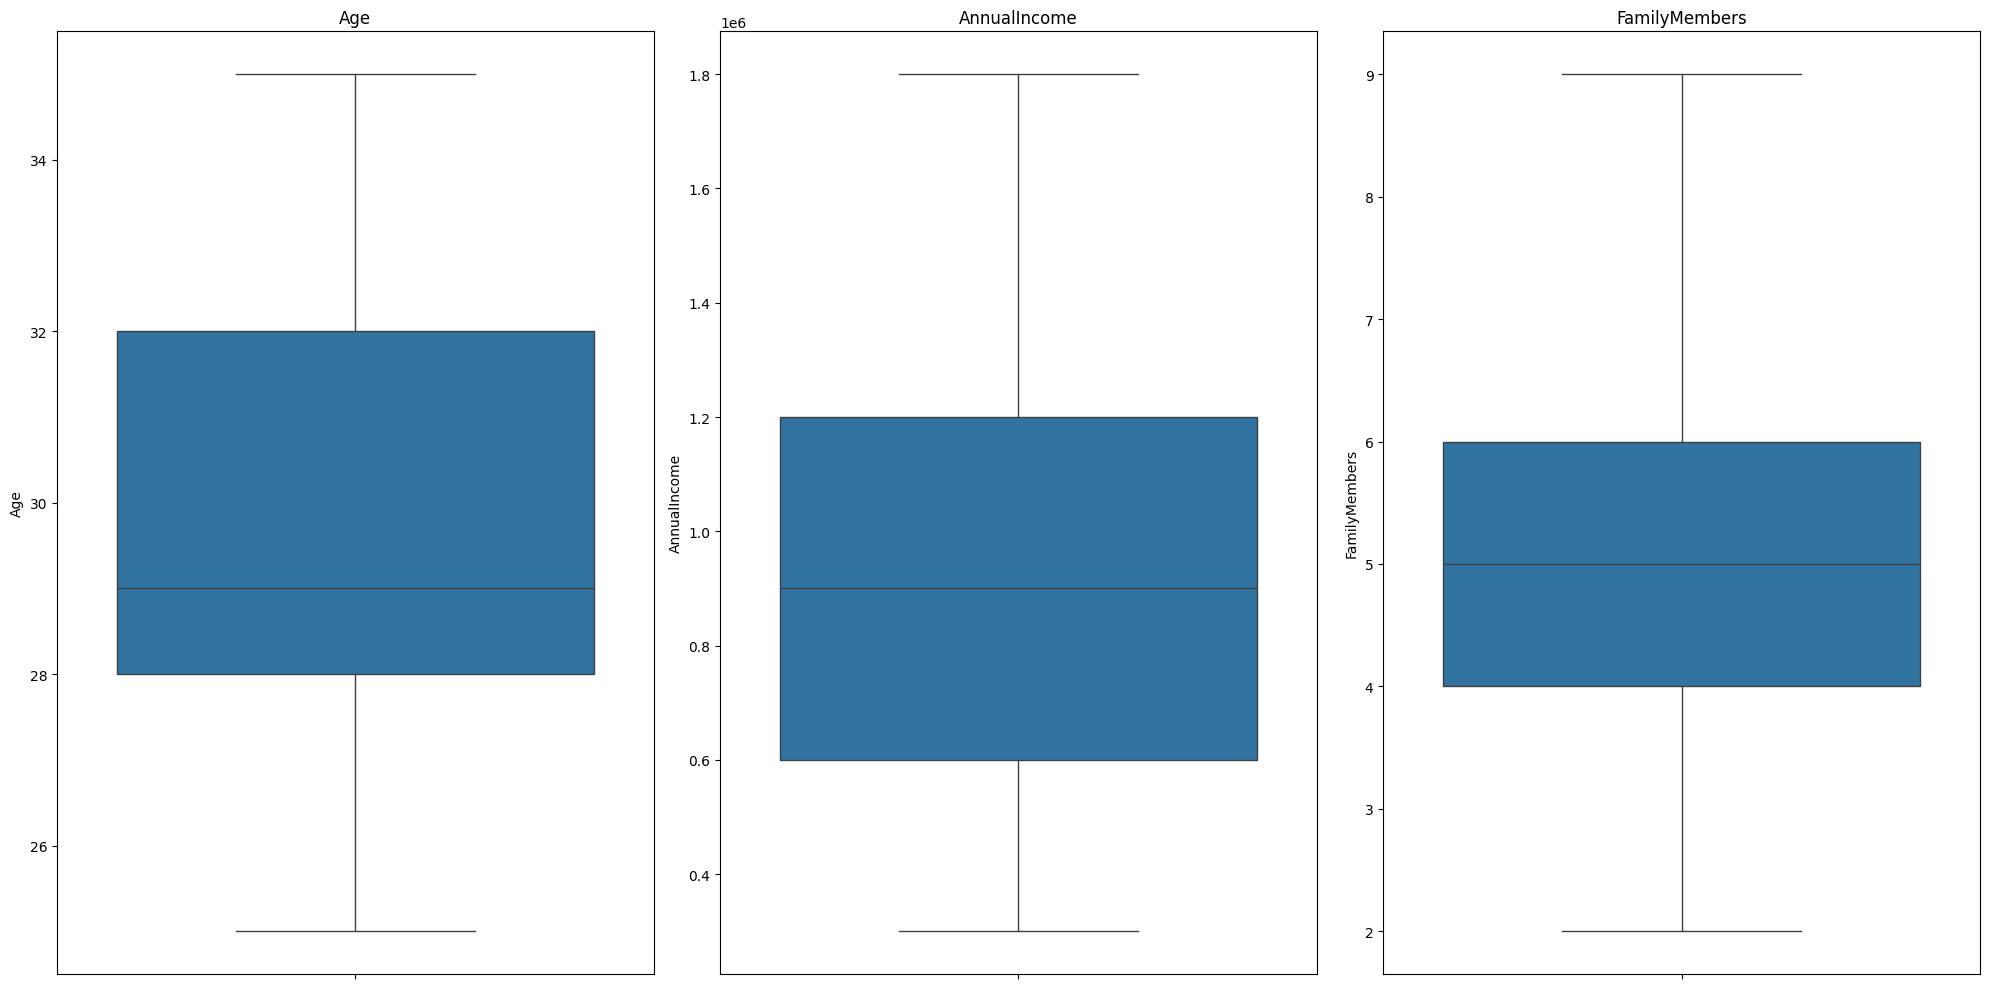

In [21]:
fig, ax = plt.subplots(1, len(numerical_col[:3]), figsize=(20,10))

for axes, col in enumerate(numerical_col[:3]):
  sns.boxplot(y=col, data=insurance, ax=ax[axes])
  ax[axes].set_title(col)

plt.tight_layout()
plt.show()

fig.savefig("boxplot.jpg", bbox_inches='tight')

Berdasarkan boxplot, fitur-fitur numerik pada dataset "TravelInsurance", yaitu Usia (Age), Pendapatan Tahunan (AnnualIncome), dan Jumlah Anggota Keluarga (FamilyMembers), menunjukkan distribusi data yang tidak memiliki outlier.

- 75% dari pelanggan memiliki usia di bawah 32 tahun.
- 75% dari pelanggan memiliki pendapatan tahunan kurang dari 1.200.000.
- 75% dari pelanggan memiliki kurang dari 6 anggota keluarga.

### Univariate Analysis

In [22]:
def currency_formatter(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:1.0f}k'.format(x * 1e-3)
    else:
        return '{:1.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)

Employment Type
Private Sector/Self Employed    876
Government Sector               373
Name: count, dtype: int64 



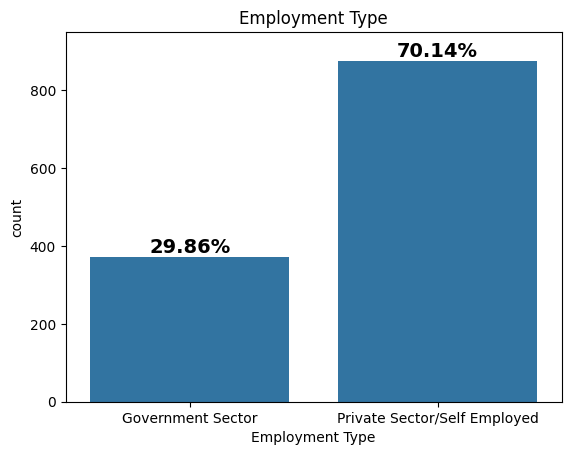

In [23]:
print(insurance[categorical_col[0]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[0], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[0])
plt.ylim(0, 950)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.savefig("employment_type.jpg", bbox_inches='tight')

Terdapat dua kategori pada fitur Employment Type, yaitu Government Sector dan Private Sector/Self Employed. Dari persentase pada diagram batang di atas, dapat disimpulkan bahwa 70% pelanggan bekerja di sektor Swasta atau sebagai Wiraswasta.

GraduateOrNot
Yes    1047
No      202
Name: count, dtype: int64 



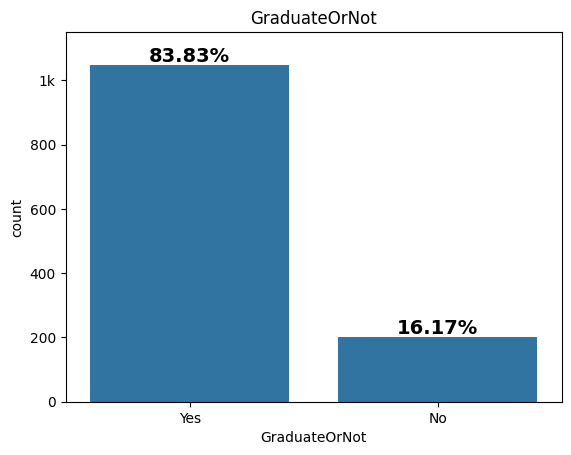

In [24]:
print(insurance[categorical_col[1]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[1], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[1])
plt.ylim(0, 1150)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.savefig("GraduateOrNot.jpg", bbox_inches='tight')

Sebagian besar pelanggan, lebih dari 80%, telah lulus kuliah. Hal ini menunjukkan bahwa mayoritas pelanggan memiliki tingkat pendidikan yang lebih tinggi, yang mungkin mengindikasikan kestabilan finansial dan potensi untuk membeli produk asuransi perjalanan.

FrequentFlyer
No     954
Yes    295
Name: count, dtype: int64 



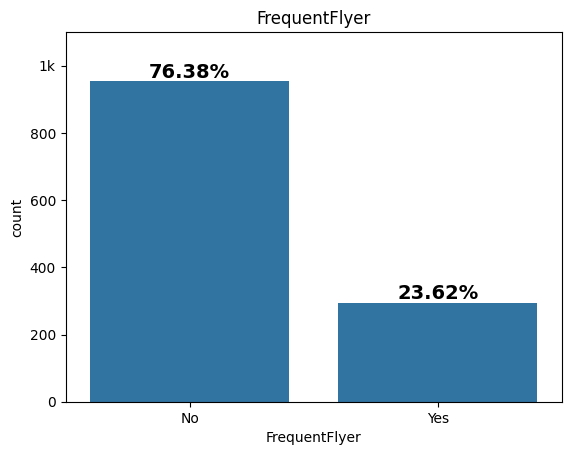

In [25]:
print(insurance[categorical_col[2]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[2], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[2])
plt.ylim(0, 1100)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.savefig("FrequentFlyer.jpg", bbox_inches='tight')

Mayoritas pelanggan, sekitar 70%, tidak memiliki status FrequentFlyer. Ini menunjukkan bahwa sebagian besar pelanggan tidak sering melakukan perjalanan dengan pesawat dalam dua tahun terakhir.

EverTravelledAbroad
No     1005
Yes     244
Name: count, dtype: int64 



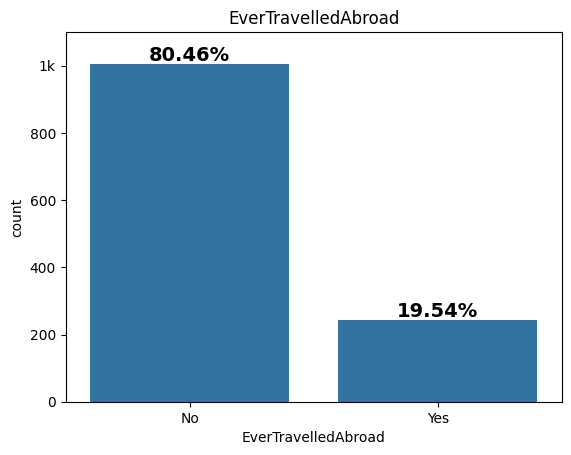

In [26]:
print(insurance[categorical_col[3]].value_counts(), '\n')

ax = sns.countplot(x=categorical_col[3], data=insurance)
ax.yaxis.set_major_formatter(formatter)
plt.title(categorical_col[3])
plt.ylim(0, 1100)

t = float(len(insurance))
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 10,
            s='{:.2f}%'.format((height / t) * 100),
            fontdict={'fontsize':14, 'fontweight':'bold'},
            ha='center')

plt.savefig("evertravelledabroad.jpg", bbox_inches='tight')

80% pelanggan tidak pernah melakukan perjalanan ke luar negeri. Hal ini menunjukkan bahwa mayoritas pelanggan memiliki pengalaman perjalanan yang terbatas di luar negeri, yang dapat memengaruhi minat mereka terhadap pembelian paket asuransi perjalanan.

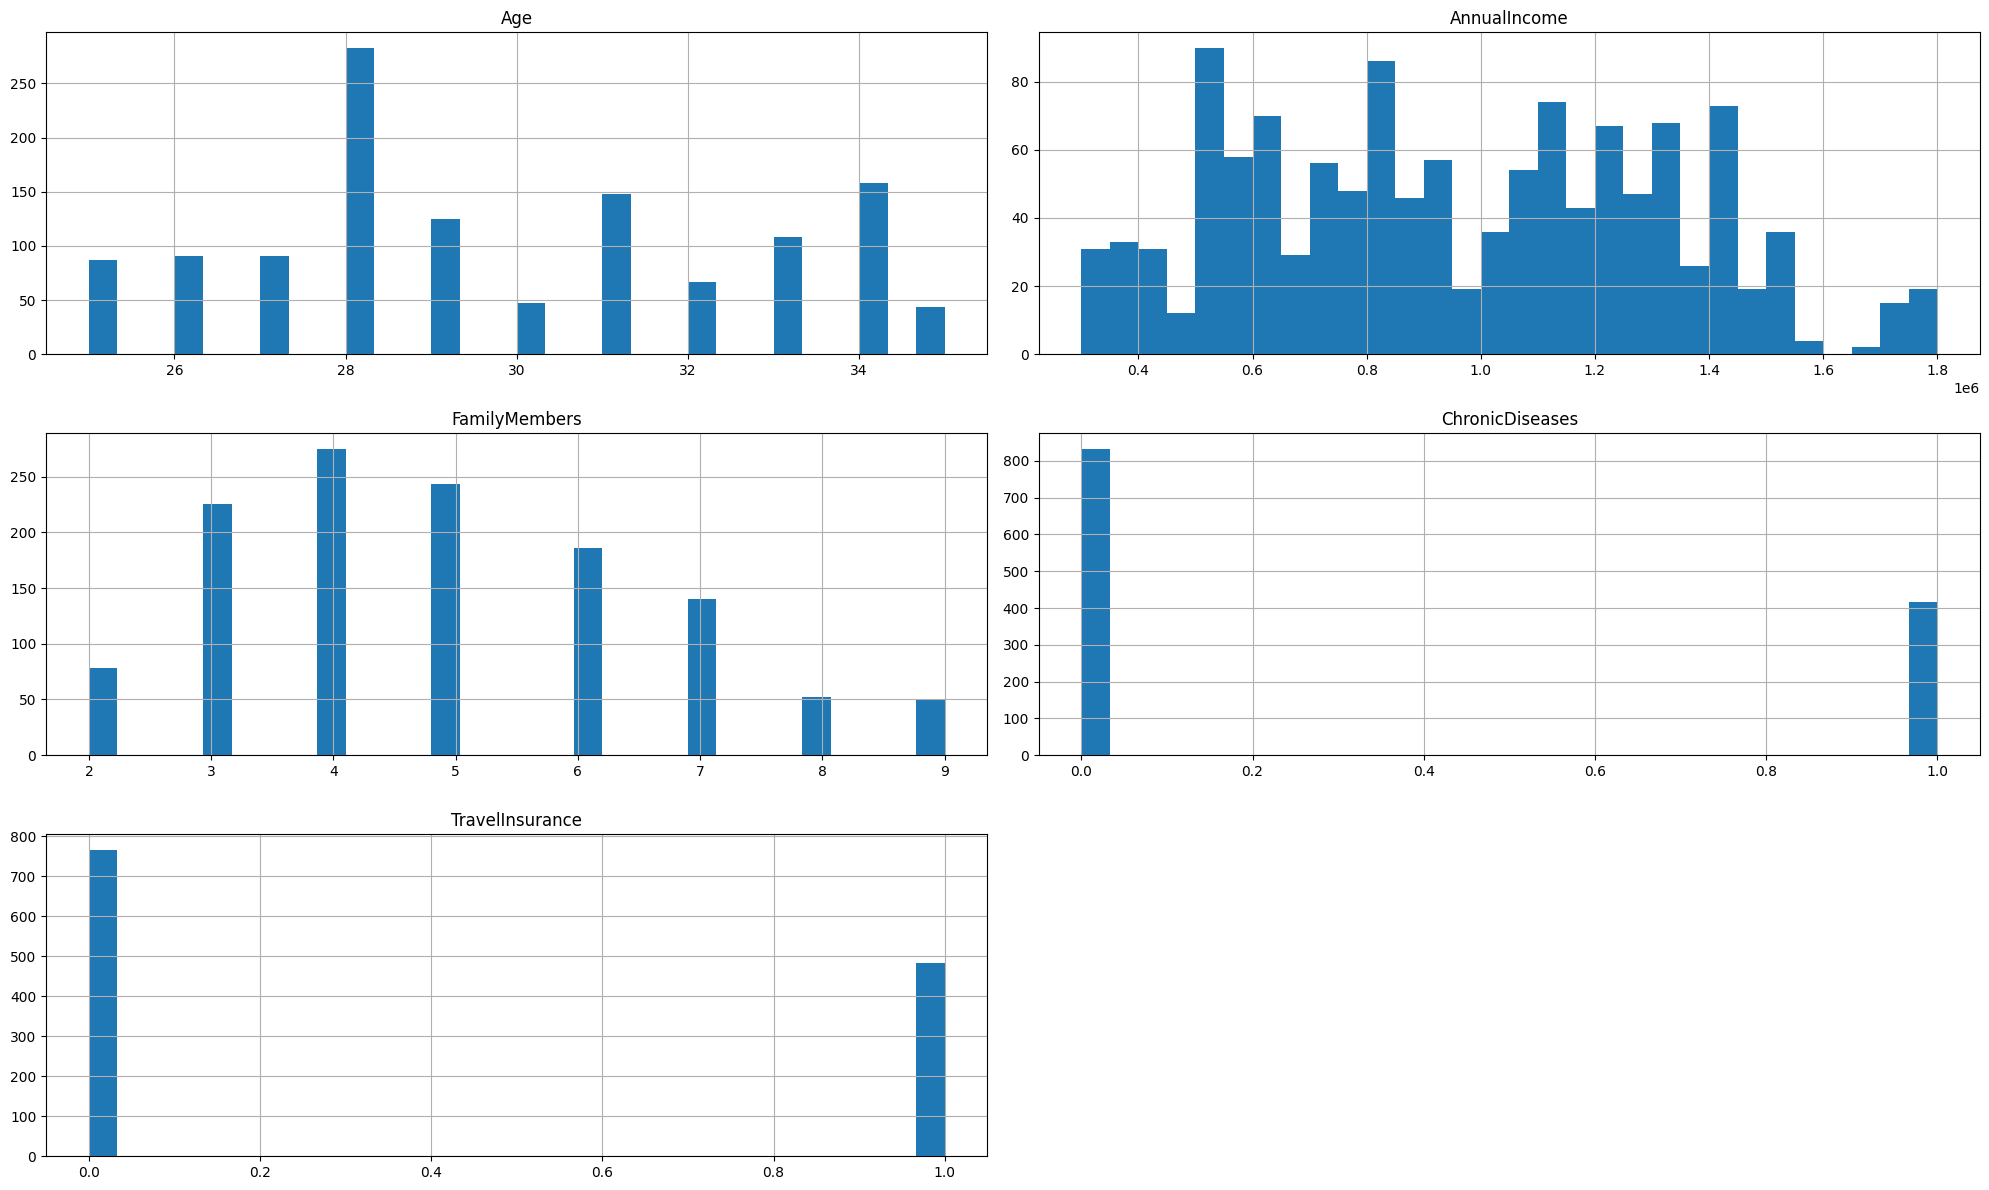

In [27]:
insurance.hist(bins=30, figsize=(20,12))
plt.tight_layout()

plt.savefig("num_plot.jpg", bbox_inches='tight')

Berdasarkan histogram di atas, diperoleh beberapa informasi, antara lain:

- Mayoritas pelanggan berusia 28 tahun.
- Rentang pendapatan tahunan pelanggan berkisar antara 300.000 rupee hingga 1.800.000 rupee.
- Jumlah anggota keluarga pelanggan didominasi oleh pelanggan dengan jumlah anggota keluarga berkisar antara 3 hingga 5 orang.
- Sebagian besar pelanggan tidak menderita penyakit kronis.
- Terdapat ketimpangan pada label atau target fitur, yaitu TravelInsurance, dengan jumlah pelanggan yang membeli paket asuransi perjalanan lebih sedikit dibandingkan dengan pelanggan yang tidak membeli.

### Multivariate Analysis

In [28]:
def proportion_graph(df, col, hue):
  x = df.groupby(col)[hue].value_counts(normalize=True).unstack()

  x.plot(kind='bar', stacked=True)
  plt.title(f"Proportion of {hue} Purchases by {col}")
  plt.xlabel(col)
  plt.ylabel("Proportion")
  plt.xticks(rotation=0)
  plt.yticks(ticks=np.linspace(0,1,11))
  plt.legend(title=hue, loc=1)

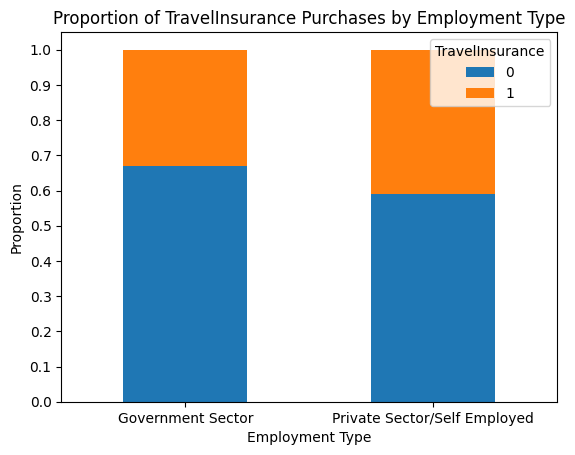

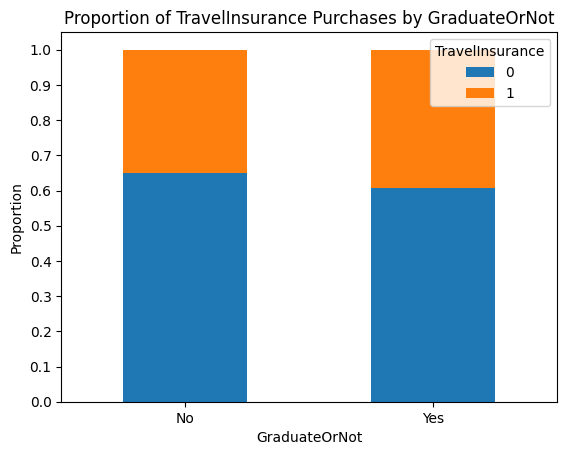

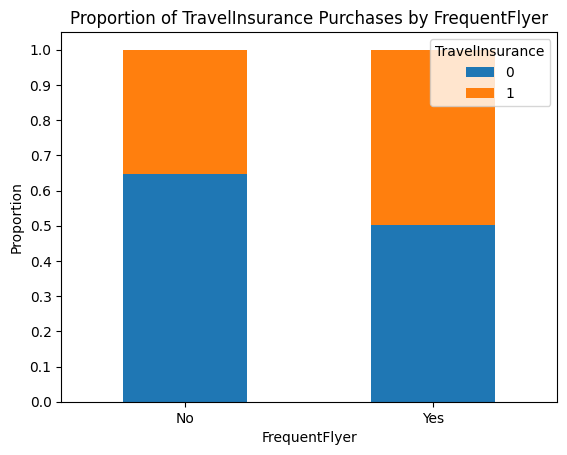

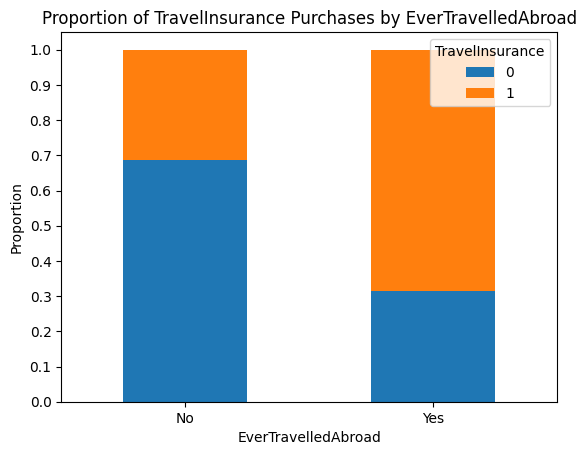

In [29]:
for col in categorical_col:
  proportion_graph(insurance, col, 'TravelInsurance')

  plt.savefig(f"proportion_{col}.jpg", bbox_inches='tight')

Berdasarkan analisis visual, secara intuitif terlihat bahwa pelanggan yang pernah melakukan perjalanan ke luar negeri cenderung memiliki kemungkinan lebih tinggi untuk membeli paket asuransi perjalanan dibandingkan dengan pelanggan yang belum pernah melakukan perjalanan ke luar negeri. Selain itu, terlihat juga bahwa pelanggan yang bekerja di sektor swasta, memiliki gelar sarjana, dan memiliki status FrequentFlyer cenderung memiliki kemungkinan lebih tinggi untuk membeli paket asuransi, meskipun perbedaannya tidak begitu signifikan.

Oleh karena itu, akan dilakukan uji chi-squared menggunakan chi2_contingency untuk menentukan apakah terdapat hubungan statistik antara fitur kategori dan fitur target (Travel Insurance). Dengan tingkat signifikansi 5%, diasumsikan hipotesis berikut:

$H_0$ : Tidak ada hubungan yang signifikan antara fitur kategori dan fitur target (Travel Insurance).

$H_1$ : Terdapat hubungan yang signifikan antara setidaknya satu fitur kategori dan fitur target (Travel Insurance).

In [111]:
def contingency_table(index, column, data = insurance):
  observed = []
  contingency_table = pd.pivot_table(data=data, index=index,columns=column, aggfunc='size')
  contingency_table.columns.name = None

  buy_insurance = contingency_table.loc[1].to_list()
  observed.append(buy_insurance)

  not_buy_insurance = contingency_table.loc[0].to_list()
  observed.append(not_buy_insurance)

  return observed

In [117]:
alpha = 0.05

for cat in categorical_col:
  obs = contingency_table('TravelInsurance', cat)
  rest = chi2_contingency(obs)
  print(cat)
  print(rest.pvalue)

  if rest.pvalue < 0.05:
    print('Ada cukup bukti tolak hipotesis nol')
    print(f'Terdapat hubungan yang signifikan antara {cat} dan Travel Insurance \n')
  else:
    print('Tidak ada cukup bukti, gagal tolak hipotesis nol')
    print(f'Tidak terdapat hubungan yang signifikan antara {cat} dan Travel Insurance \n')

Employment Type
0.008454155421443737
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara Employment Type dan Travel Insurance 

GraduateOrNot
0.2965351968551507
Tidak ada cukup bukti, gagal tolak hipotesis nol
Tidak terdapat hubungan yang signifikan antara GraduateOrNot dan Travel Insurance 

FrequentFlyer
9.20733122419198e-06
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara FrequentFlyer dan Travel Insurance 

EverTravelledAbroad
4.0034414530103906e-26
Ada cukup bukti tolak hipotesis nol
Terdapat hubungan yang signifikan antara EverTravelledAbroad dan Travel Insurance 



Berdasarkan hasil uji chi-squared dengan tingkat signifikansi 5%, ditemukan bahwa terdapat hubungan yang signifikan antara beberapa fitur kategori dan Travel Insurance. Lebih spesifiknya, Employment Type, FrequentFlyer, dan EverTravelledAbroad memiliki hubungan yang signifikan dengan Travel Insurance. Namun, tidak terdapat hubungan yang signifikan antara GraduateOrNot dan Travel Insurance. Oleh karena itu, fitur-fitur seperti Employment Type, FrequentFlyer, dan EverTravelledAbroad mungkin memiliki pengaruh yang lebih besar terhadap keputusan untuk membeli asuransi perjalanan dibandingkan dengan status lulusan.

<Figure size 800x600 with 0 Axes>

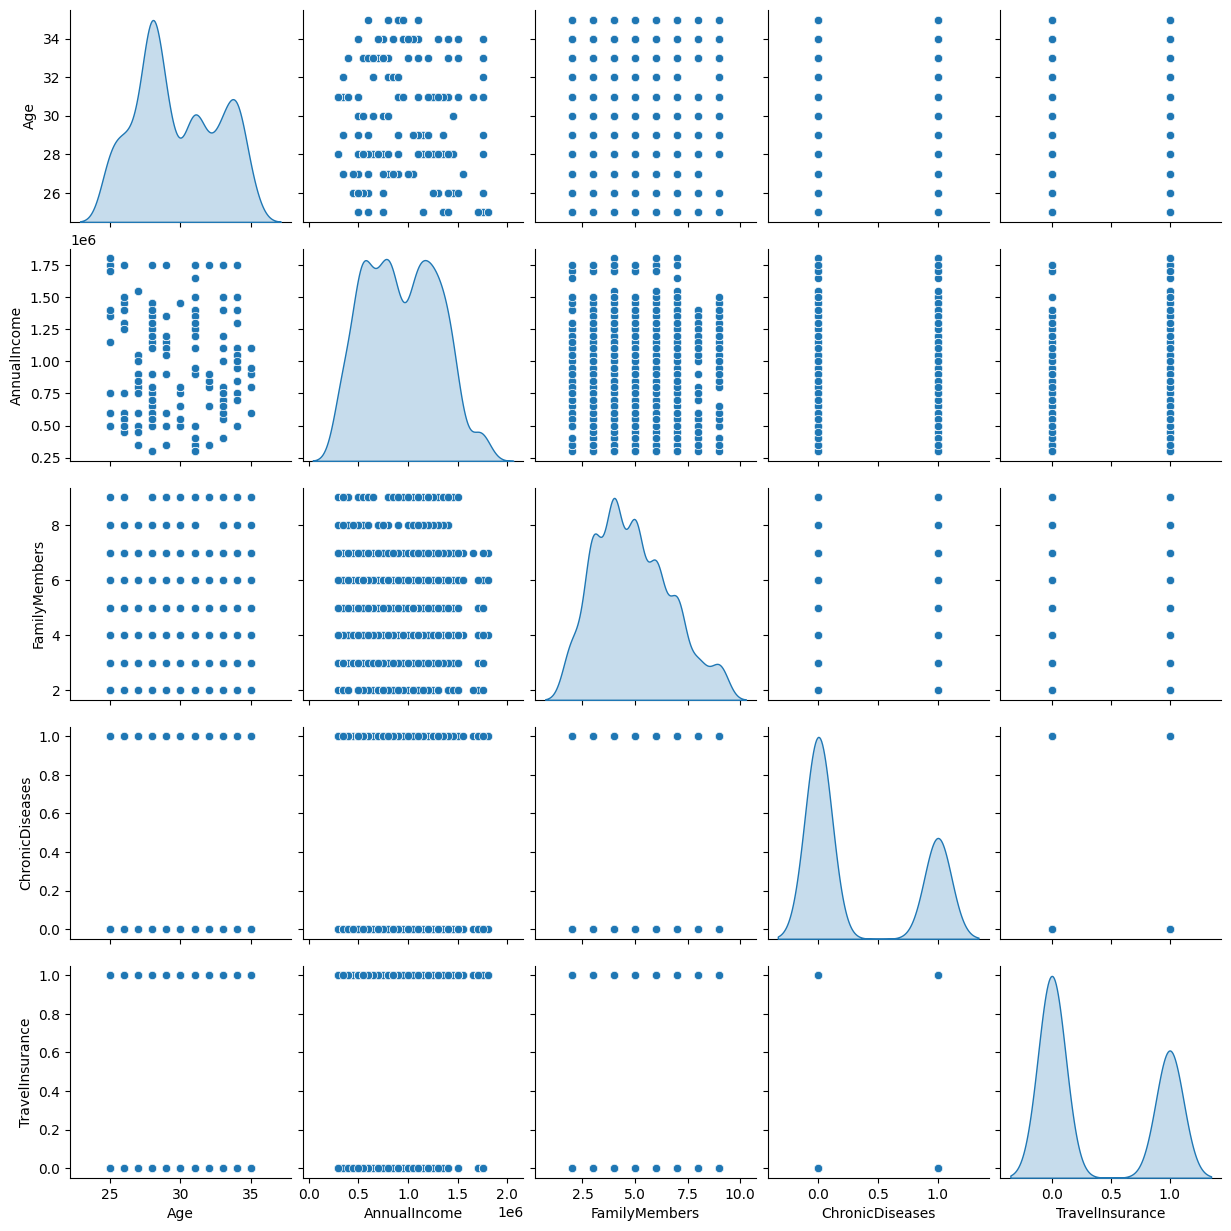

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(data=insurance, diag_kind='kde')

plt.savefig("pairplot.jpg", bbox_inches='tight')

Berdasarkan grafik, tidak terlihat pola menarik yang menunjukkan hubungan antara TravelInsurance dengan fitur-fitur numerik lainnya.

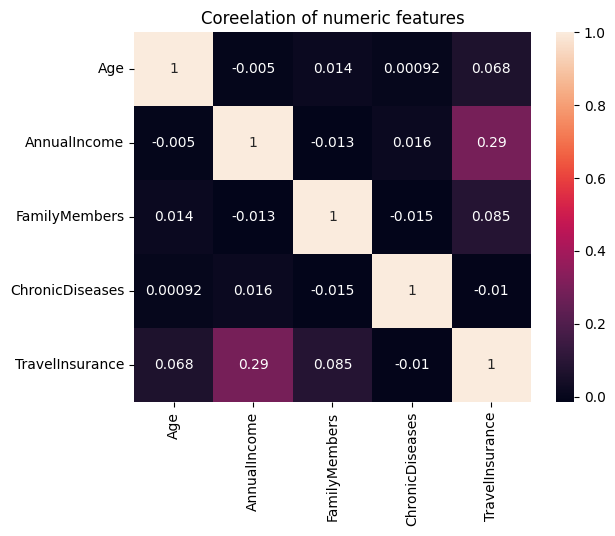

In [120]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True)
plt.title("Coreelation of numeric features")

plt.savefig("heatmap.jpg", bbox_inches='tight')

Dari matriks tersebut, dapat dilihat bahwa:

- Age: memiliki korelasi positif yang rendah dengan keputusan untuk membeli asuransi perjalanan (TravelInsurance).
- AnnualIncome: memiliki korelasi positif yang sedang dengan keputusan untuk membeli asuransi perjalanan.
- FamilyMembers: memiliki korelasi positif yang rendah dengan keputusan untuk membeli asuransi perjalanan.
- ChronicDiseases: memiliki korelasi negatif yang rendah dengan keputusan untuk membeli asuransi perjalanan.

## Data Preparation

### Encoding Fitur Categori

In [ ]:
insurance[categorical_col]

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1976,Government Sector,Yes,No,No
1981,Government Sector,Yes,No,No
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes


Dari fitur-fitur kategori yang tersedia, rencananya akan dilakukan proses pengkodean kategori atau pemetaan (mapping) pada fitur Employment Type, GraduateOrNot, FrequentFlyer, dan EverTravelledAbroad. Pada fitur Employment Type, nilai "Government Sector" akan diubah menjadi 1 dan "Private Sector/Self Employed" akan diubah menjadi 0. Sedangkan pada fitur-fitur kategori lainnya, nilai "Yes" akan diubah menjadi 1 dan "No" akan diubah menjadi 0.

In [ ]:
insurance_clean = insurance.copy()
insurance_clean['is_Goverment_Sector'] = insurance_clean[categorical_col[0]].map(lambda x: 1 if x=='Government Sector' else 0)
insurance_clean[categorical_col[1:]] = insurance_clean[categorical_col[1:]].applymap(
                                  lambda x: 1 if x == 'Yes' else 0)
insurance_clean.drop('Employment Type', axis=1, inplace=True)

insurance_clean

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,is_Goverment_Sector
0,31,1,400000,6,1,0,0,0,1
1,31,1,1250000,7,0,0,0,0,0
2,34,1,500000,4,1,0,0,1,0
3,28,1,700000,3,1,0,0,0,0
4,28,1,700000,8,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1976,32,1,900000,6,0,0,0,0,1
1981,27,1,850000,3,0,0,0,1,1
1982,33,1,1500000,4,0,1,1,1,0
1983,28,1,1750000,5,1,0,1,0,0


Setelah melakukan mapping. Langkah-langkah ini membantu dalam mengubah data kategorikal menjadi format yang dapat dimengerti oleh algoritma pembelajaran mesin, sehingga memungkinkan untuk membangun model prediksi dengan akurasi yang lebih baik.

### Train Test Split

In [ ]:
X = insurance_clean.drop('TravelInsurance', axis=1)
y = insurance_clean['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1249
Total # of sample in train dataset: 999
Total # of sample in test dataset: 250


### Handling Imbalanced Data

In [ ]:
y_train.value_counts()

0    616
1    383
Name: TravelInsurance, dtype: int64

Diketahui bahwa pada fitur target terdapat ketidakseimbangan dalam dataset, yaitu antara pelanggan yang membeli paket asuransi perjalanan dan pelanggan yang tidak membeli. Berdasarkan data, jumlah pelanggan yang membeli paket asuransi perjalanan lebih sedikit, sehingga termasuk dalam kategori minority class. Oleh karena itu, perlu dilakukan oversampling dengan menambahkan data sintetis untuk minority class atau melakukan undersampling dengan mengurangi data majority class agar data menjadi seimbang.

In [ ]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

0    616
1    616
Name: TravelInsurance, dtype: int64


Pada kasus ini, dilakukan oversampling menggunakan metode SMOTE (Synthetic Minority Oversampling TEchnique). Metode ini bekerja dengan cara memilih sampel yang dekat dengan ruang fitur, menggambar garis di antara sampel dalam ruang fitur, dan menggambar sampel baru pada titik di sepanjang garis tersebut. SMOTE membantu dalam menciptakan data sintetis untuk minority class sehingga mengimbangi jumlah sampel antara kelas mayoritas dan kelas minoritas dalam dataset.

### Standarisasi

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data.

In [ ]:
numerical_features = ['Age', 'FamilyMembers', 'AnnualIncome']
scaler = StandardScaler()
scaler.fit(X_train_sm[numerical_features])
X_train_sm[numerical_features] = scaler.transform(X_train_sm.loc[:, numerical_features])
X_train_sm[numerical_features].head()

,Age,FamilyMembers,AnnualIncome
0,-0.612476,-1.062150,0.931411
1,-0.612476,0.667998,-1.828505
2,1.071081,0.667998,-1.552513
3,-0.949187,0.667998,0.103436
4,0.060947,-1.638866,-1.138526


In [ ]:
X_train_sm[numerical_features].describe().round(4)

,Age,FamilyMembers,AnnualIncome
count,1232.0000,1232.0000,1232.0000
mean,0.0000,0.0000,-0.0000
std,1.0004,1.0004,1.0004
min,-1.6226,-1.6389,-1.8285
25%,-0.6125,-1.0621,-0.8625
50%,-0.2758,0.0913,0.1034
75%,1.0711,0.6680,0.7934
max,1.7445,2.3981,2.3114


 Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

## Model Development

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

- Logistic Regression (Base Model)
- Random Forest
- GradientBoostingClassifier
- AdaBoostClassifier

In [ ]:
def evaluate_train(model, X_train, y_train):
  model_name = type(model).__name__
  df = pd.DataFrame()
  model.fit(X_train, y_train)

  scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

  # evaluation training
  df.loc[model_name, 'accuracy'] = cv_results['test_accuracy'].mean()
  df.loc[model_name, 'precision'] = cv_results['test_precision'].mean()
  df.loc[model_name, 'recall'] = cv_results['test_recall'].mean()
  df.loc[model_name, 'f1_score'] = cv_results['test_f1'].mean()
  df.loc[model_name, 'roc_auc_score'] = cv_results['test_roc_auc'].mean()

  return df

def evaluate_test(model, X_test, y_test):
  model_name = type(model).__name__
  df = pd.DataFrame()
  y_pred = model.predict(X_test)

  # evaluation training
  df.loc[model_name, 'accuracy'] = accuracy_score(y_test, y_pred)
  df.loc[model_name, 'precision'] = precision_score(y_test, y_pred)
  df.loc[model_name, 'recall'] = recall_score(y_test, y_pred)
  df.loc[model_name, 'f1_score'] = f1_score(y_test, y_pred)
  df.loc[model_name, 'roc_auc_score'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

  return df

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression

Logistic Regression adalah model klasifikasi yang digunakan dalam machine learning untuk memprediksi probabilitas keanggotaan dari suatu kategori atau kelas. Model ini berbeda dari regresi linear yang digunakan untuk memprediksi nilai numerik kontinu, karena Logistic Regression digunakan untuk memprediksi probabilitas bahwa variabel dependen bersifat biner (kategorikal).

In [ ]:
logreg = LogisticRegression(penalty='l2', max_iter=100)
df_lr = evaluate_train(logreg, X_train_sm, y_train_sm)

df_lr

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.636375,0.653909,0.582756,0.615921,0.689298


Kelebihannya termasuk interpretasi yang mudah, cocok untuk data yang memiliki fitur kategorikal, dan relatif cepat dalam pelatihan. Namun, kelemahannya adalah linearitas yang kuat, yang berarti mungkin tidak mampu menangani hubungan yang kompleks antara fitur dan target.

### Random Forest

RandomForestClassifier adalah algoritma ensemble yang kuat untuk masalah klasifikasi. Algoritma ini menggabungkan konsep dari beberapa pohon keputusan (decision trees) yang dibangun secara acak selama proses pelatihan. Setiap pohon keputusan dibangun berdasarkan subset acak dari fitur-fitur dan sampel-sampel data, sehingga menciptakan berbagai variasi model. Selanjutnya, hasil prediksi dari setiap pohon diambil dan dihitung untuk menentukan prediksi kelas mayoritas (mode) sebagai hasil dari model Random Forest.

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)
df_rfc = evaluate_train(rfc, X_train_sm, y_train_sm)

df_rfc

,accuracy,precision,recall,f1_score,roc_auc_score
RandomForestClassifier,0.693973,0.752017,0.579544,0.654534,0.770452


Kelebihannya termasuk kemampuan untuk menangani data dengan fitur yang tidak terstruktur atau tidak beraturan, serta toleran terhadap kelebihan fitting. Namun, kelemahannya adalah kompleksitas yang tinggi dan interpretasi yang sulit dibandingkan dengan model yang lebih sederhana seperti Logistic Regression.

### Boosting Algorithm (GradientBoosting)

GradientBoostingClassifier adalah algoritma ensemble yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja dengan cara membangun serangkaian model prediktif sederhana, yang dikenal sebagai pohon keputusan, secara berurutan. Setiap model berikutnya berfokus pada memperbaiki kesalahan prediksi model sebelumnya dalam urutan yang ditentukan sebelumnya. GradientBoostingClassifier mengoptimalkan fungsi kerugian (loss function) dengan menggunakan gradien descent, sehingga mengarah ke peningkatan kinerja model secara bertahap.

In [ ]:
gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
df_gbc = evaluate_train(gbc, X_train_sm, y_train_sm)

df_gbc

,accuracy,precision,recall,f1_score,roc_auc_score
GradientBoostingClassifier,0.697245,0.74632,0.600629,0.664979,0.775721


Kelebihannya termasuk kemampuan untuk menangani data yang tidak teratur dan kompleksitas model yang dapat diatur melalui hiperparameter. Namun, kelemahannya adalah cenderung overfit jika tidak diatur dengan benar.

### Boosting Algorithm (AdaBoost)

AdaboostClassifier, singkatan dari Adaptive Boosting Classifier, adalah algoritma ensemble yang digunakan untuk masalah klasifikasi. Algoritma ini bekerja dengan cara membangun serangkaian model lemah (biasanya pohon keputusan dangkal) secara berurutan. Setiap model lemah berfokus pada contoh data yang sebelumnya salah diklasifikasikan oleh model sebelumnya. Selama iterasi, bobot sampel diubah, memberikan penekanan lebih pada sampel yang sebelumnya salah diklasifikasikan. Dengan cara ini, setiap model lemah "belajar" untuk mengkompensasi kesalahan model sebelumnya. Pada tahap akhir, hasil prediksi dari semua model lemah dijumlahkan, dan kelas target dipilih berdasarkan bobot akhir dari masing-masing model lemah.

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
df_ada = evaluate_train(ada, X_train_sm, y_train_sm)

df_ada

,accuracy,precision,recall,f1_score,roc_auc_score
AdaBoostClassifier,0.670442,0.716388,0.568188,0.633015,0.731654


 Kelebihannya adalah kemampuan untuk menangani data yang tidak seimbang dan kemampuan untuk bekerja dengan baik dengan model yang sederhana. Namun, kelemahannya adalah rentan terhadap noise dan outlier dalam data.

## Evaluation Model

Matriks evaluasi yang digunakan meliputi Accuracy, Precision, Recall, F1 Score, dan ROC AUC. Di antara semua metrik tersebut, ROC AUC dipilih sebagai matriks evaluasi utama karena kemampuannya untuk mengukur false positif dan false negatif, yang sangat penting dalam kasus klasifikasi yang tidak seimbang. Dengan memperhatikan matriks evaluasi ini, model klasifikasi terbaik dapat dipilih berdasarkan kinerjanya dalam memisahkan kelas positif dan negatif.

In [ ]:
df_eval_train = pd.concat([df_lr, df_rfc, df_gbc, df_ada], axis=0)
df_eval_train

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.636375,0.653909,0.582756,0.615921,0.689298
RandomForestClassifier,0.693973,0.752017,0.579544,0.654534,0.770452
GradientBoostingClassifier,0.697245,0.746320,0.600629,0.664979,0.775721
AdaBoostClassifier,0.670442,0.716388,0.568188,0.633015,0.731654


Berdasarkan matriks evaluasi pada data train, diperoleh bahwa untuk sementara model GradientBoostingClassifier merupakan model terbaik dibanding model lainnya dengan ROC AUC 77%. Selanjutnya, akan dilakukan evaluasi pada data test, perlu dilakukan proses scaling terhadap data test. Hal ini harus dilakukan agar skala antara data train dan data test sama dan kita bisa melakukan evaluasi.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
df_lr_test = evaluate_test(logreg, X_test, y_test)
df_rfc_test = evaluate_test(rfc, X_test, y_test)
df_gbc_test = evaluate_test(gbc, X_test, y_test)
df_ada_test = evaluate_test(ada, X_test, y_test)

df_eval_test = pd.concat([df_lr_test, df_rfc_test, df_gbc_test, df_ada_test], axis=0)
df_eval_test

,accuracy,precision,recall,f1_score,roc_auc_score
LogisticRegression,0.612,0.515152,0.51,0.512563,0.658200
RandomForestClassifier,0.696,0.633333,0.57,0.600000,0.719267
GradientBoostingClassifier,0.712,0.662791,0.57,0.612903,0.748067
AdaBoostClassifier,0.688,0.622222,0.56,0.589474,0.723400


Hasil yang sama diperoleh, bahwa model GradientBoostingClassifier merupakan model terbaik dibanding model lainnya. Berikut perbandingan antar model untuk matriks ROC AUC pada setiap model.

In [ ]:
df_eval_roc = pd.concat([df_eval_train['roc_auc_score'], df_eval_test['roc_auc_score']], axis=1)
df_eval_roc.columns = ['ROC AUC - Train', 'ROC AUC - Test']
df_eval_roc

,ROC AUC - Train,ROC AUC - Test
LogisticRegression,0.689298,0.658200
RandomForestClassifier,0.770452,0.719267
GradientBoostingClassifier,0.775721,0.748067
AdaBoostClassifier,0.731654,0.723400


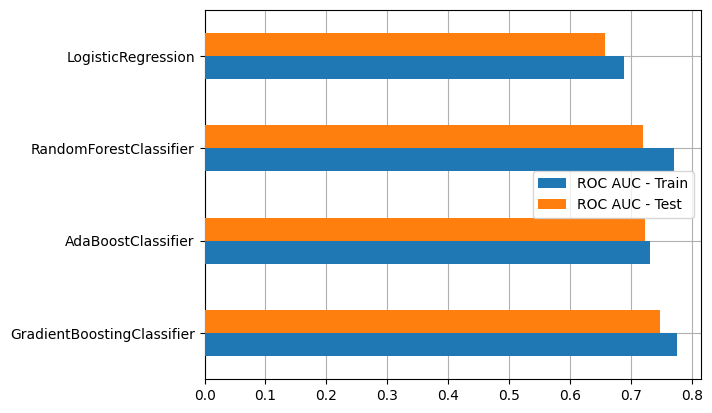

In [ ]:
fig, ax = plt.subplots()
df_eval_roc.sort_values(by='ROC AUC - Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

plt.savefig("comparison-model.jpg", bbox_inches='tight')

Berdasarkan perbandingan nilai ROC AUC, model GradientBoostingClassifier menunjukkan kinerja yang baik dengan nilai 74% pada data test. Ini menunjukkan bahwa model tersebut memiliki kemampuan yang cukup baik dalam membedakan antara kelas positif dan negatif. Oleh karena itu, berdasarkan metrik evaluasi ini, dapat disimpulkan bahwa GradientBoostingClassifier adalah model terbaik di antara model lain yang dievaluasi.

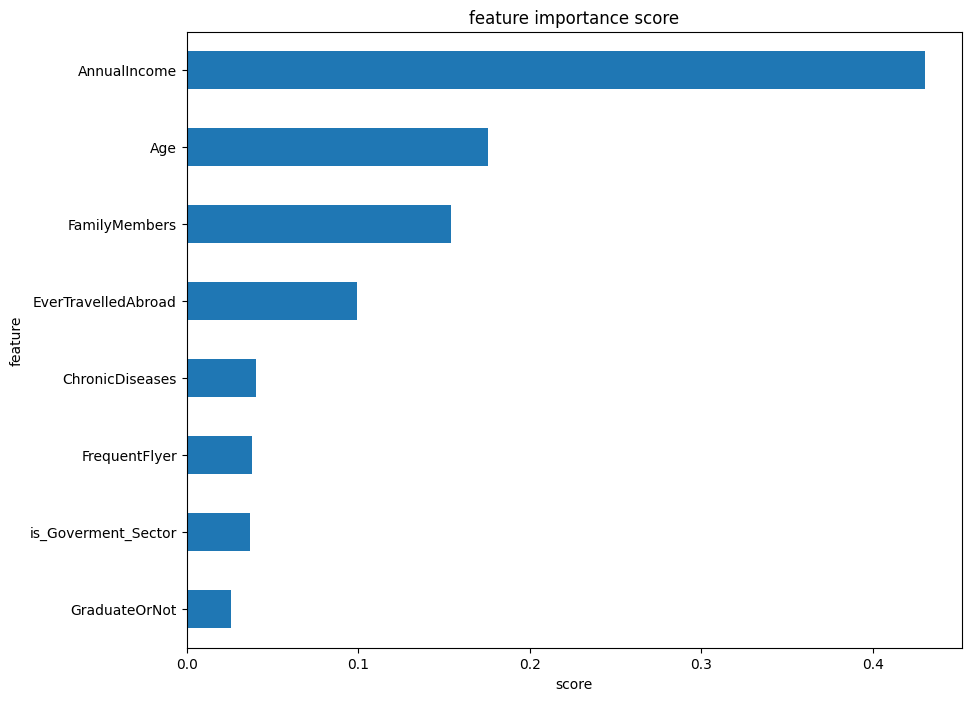

In [ ]:
show_feature_importance(rfc)

plt.savefig("feature-importance.jpg", bbox_inches='tight')

Dari hasil fitur penting yang diperoleh dari model, ditemukan bahwa AnnualIncome, FamilyMembers, dan Age adalah fitur-fitur yang memiliki kontribusi signifikan dalam memprediksi apakah seorang pelanggan akan membeli paket asuransi perjalanan. Oleh karena itu, fitur-fitur ini dianggap sebagai faktor penting dalam keputusan pembelian pelanggan.